In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
features = data.iloc[:, :-1].values
label = data.iloc[:, -1].values

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(transformers=[
    ("numerical", StandardScaler(), np.arange(start=0, stop=features.shape[1]-1).tolist()),
    ("categorical", OneHotEncoder(), [features.shape[1]-1])
])

newFeatures = preprocessor.fit_transform(features)
newFeatures

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

In [5]:
from sklearn.decomposition import PCA
principalComponents = PCA(n_components=6) #Here n_components = n_features
principalComponents.fit(newFeatures,label)

PCA(n_components=6)

In [6]:
principalComponents.explained_variance_ratio_

array([4.82482078e-01, 2.78353607e-01, 9.36260572e-02, 8.77049799e-02,
       5.78332772e-02, 3.65978517e-33])

In [7]:
from sklearn.decomposition import PCA
finalprincipalComponents = PCA(n_components=1) #Here n_components = n_features
finalprincipalComponents.fit(newFeatures,label)

PCA(n_components=1)

In [8]:
finalFeatures = finalprincipalComponents.transform(newFeatures)

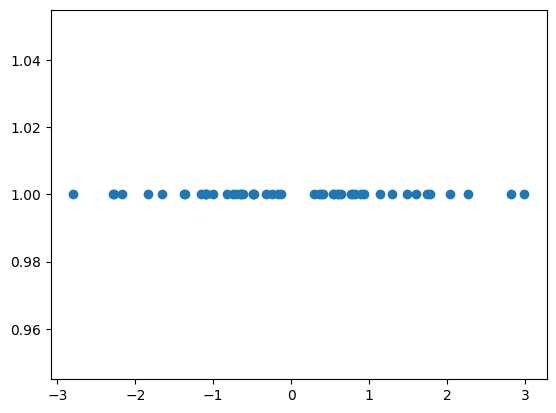

In [9]:
import matplotlib.pyplot as plt
plt.scatter(finalFeatures[:,0],np.ones(len(finalFeatures)))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

best = [0, 0, 0]

for i in range(10000):
    X_train,X_test,y_train,y_test = train_test_split(finalFeatures,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=i)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    train_score = lr.score(X_train, y_train)
    if test_score >= best[0] and test_score >= train_score:
        print("Test: ", test_score, "Train: ", train_score, "RS: ", i)
        best = [test_score, train_score, i]

Test:  0.9121206222206546 Train:  0.8481901727769154 RS:  3
Test:  0.917920958670217 Train:  0.8510835155068894 RS:  10
Test:  0.9206575855635736 Train:  0.8550959816802236 RS:  15
Test:  0.9369203717559759 Train:  0.8422202300887792 RS:  20
Test:  0.9391818088237276 Train:  0.8458439546688377 RS:  21
Test:  0.9550646019123827 Train:  0.8317326934559064 RS:  29
Test:  0.9608897744463665 Train:  0.8516505833400897 RS:  50
Test:  0.9703959790154909 Train:  0.8118188470648853 RS:  103
Test:  0.9888100947131052 Train:  0.8007793485573433 RS:  320
Test:  0.9888589089893474 Train:  0.8190173928207352 RS:  3340
Test:  0.9907105072558393 Train:  0.8122333304228277 RS:  3398


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

best = [0, 0, 0]

for i in range(10000):
    X_train,X_test,y_train,y_test = train_test_split(finalFeatures,
                                                    label,
                                                    test_size=0.1,
                                                    random_state=i)

    KNR = KNeighborsRegressor(n_neighbors=7)
    KNR.fit(X_train, y_train)
    test_score = KNR.score(X_test, y_test)
    train_score = KNR.score(X_train, y_train)
    if test_score >= best[0] and test_score >= train_score:
        print("Test: ", test_score, "Train: ", train_score, "RS: ", i)
        best = [test_score, train_score, i]

Test:  0.8596275209059517 Train:  0.8500546590501562 RS:  0
Test:  0.8766925389504823 Train:  0.8518342228531316 RS:  2
Test:  0.9162581390323847 Train:  0.8447190548882418 RS:  9
Test:  0.9175242814581591 Train:  0.8514073147283652 RS:  20
Test:  0.9362265375044602 Train:  0.8564783507168267 RS:  21
Test:  0.9371649125466146 Train:  0.8349317434945556 RS:  62
Test:  0.9564883823537288 Train:  0.8490957492561093 RS:  63
Test:  0.9656607962066767 Train:  0.8491420099921957 RS:  212
Test:  0.9798611582712096 Train:  0.854775814842115 RS:  325
Test:  0.9907510257651778 Train:  0.8516166838222358 RS:  1020
Test:  0.99087681836571 Train:  0.852570155958717 RS:  3585
Test:  0.9940191336191588 Train:  0.8553352822307754 RS:  5545
Test:  0.9980276378208888 Train:  0.8555995823551905 RS:  5956


In [12]:
model = KNeighborsRegressor(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(finalFeatures, label, test_size=0.1, random_state=5956)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [13]:
userRD = float(input("What is your company's R&D Spending: "))
userAdmin = float(input("What is your company's Administration Spending: "))
userMrkt = float(input("What is your company's Marketing Spending: "))
userState = input("Where is your company located? (New York, California, or Florida): ").title()

userFeatures = np.array([np.hstack([userRD, userAdmin, userMrkt, userState])])
userFeatures = preprocessor.transform(userFeatures)

userFeatures = finalprincipalComponents.transform(userFeatures)

prediction = model.predict(userFeatures)
print(prediction)

[58060.54857143]
